In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

based on article here:
https://magicseaweed.com/news/hint-you-can-use-our-swell-charts-to-tell-how-far-away-a-storm-is/11738/


In [3]:
#swell1:

swell1Dates=['00-17/08/20','03-17/08/20','06-17/08/20','09-17/08/20','12-17/08/20','15-17/08/20','18-17/08/20','21-17/08/20',
           '00-18/08/20','03-18/08/20','06-18/08/20','09-18/08/20','12-18/08/20','15-18/08/20','18-18/08/20','21-18/08/20',
           '00-19/08/20','03-19/08/20','06-19/08/20','09-19/08/20','12-19/08/20','15-19/08/20','18-19/08/20','21-19/08/20'] 

swell1Period = [9, 10, 10, 10, 10, 9, 9, 9,  #17
                8,  8,  7,  7,  7, 7, 7, 7,  #18
                7,  6,  6,  6,  6, 6, 6, 6 ]  #19

swell1Freq = []
for period in  swell1Period:
    swell1Freq.append(1/period)

swell1X = [datetime.datetime.strptime(val, '%H-%d/%m/%y') for val in swell1Dates]



In [5]:
swell2Dates=[                            '06-18/08/20','09-18/08/20','12-18/08/20','15-18/08/20','18-18/08/20','21-18/08/20',
           '00-19/08/20','03-19/08/20','06-19/08/20','09-19/08/20','12-19/08/20','15-19/08/20','18-19/08/20','21-19/08/20', 
           '00-20/08/20','03-20/08/20','06-20/08/20','09-20/08/20','12-20/08/20','15-20/08/20','18-20/08/20','21-20/08/20',
           '00-21/08/20','03-21/08/20','06-21/08/20','09-21/08/20','12-21/08/20','15-21/08/20','18-21/08/20','21-21/08/20']

swell2Period = [        8,  8,  8,10, 9, 9, #18
               9,  8,  9,  8,  8, 7, 7, 7,  #19
               7,  7,  7,  7,  6, 6, 6, 6,  #20
               6,  6,  6,  6,  6, 6, 6, 6,] #21

swell2Freq = []
for period in  swell2Period:
    swell2Freq.append(1/period)
swell2X = [datetime.datetime.strptime(val, '%H-%d/%m/%y') for val in swell2Dates]

In [6]:
#I need  datenum values to calculate trends,

# copied function python datetime to matlab datenum conversion
def datetime2matlabdn(dt):
   mdn = dt + datetime.timedelta(days = 366)
   frac_seconds = (dt-datetime.datetime(dt.year,dt.month,dt.day,0,0,0)).seconds / (24.0 * 60.0 * 60.0)
   frac_microseconds = dt.microsecond / (24.0 * 60.0 * 60.0 * 1000000.0)
   return mdn.toordinal() + frac_seconds + frac_microseconds

swell1XDatenum = []
for swelldate in swell1X:
    swell1XDatenum.append(datetime2matlabdn(swelldate))
    
swell2XDatenum = [] 
for swelldate in swell2X:
    swell2XDatenum.append(datetime2matlabdn(swelldate))
    

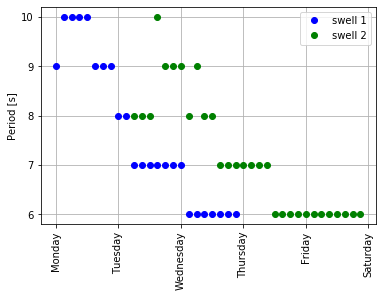

In [7]:
from matplotlib.ticker import MaxNLocator

#plot swells
ax = plt.subplot(111)
#ax.bar(x, y, width = 0.01
plt.plot(swell1X, swell1Period, 'o', color='blue', label = 'swell 1');
plt.plot(swell2X, swell2Period, 'o', color='green', label = 'swell 2');
ax.legend()

# set weekday formatter for x axis
xfmt = mdates.DateFormatter('%A')
ax.xaxis.set_major_formatter(xfmt)
# set fontsize of ticks
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=90)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel("Period [s]")

plt.grid()
plt.show()

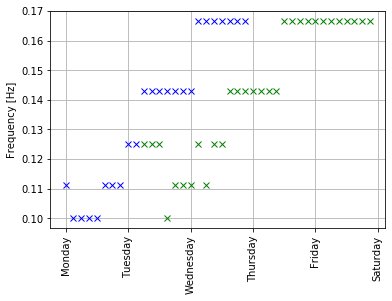

In [14]:
#plot frequencies

ax = plt.subplot(111)
#ax.bar(x, y, width = 0.01)
#label='Inline label')
plt.plot(swell1X, swell1Freq, 'x', color='blue', label = 'swell 1');
plt.plot(swell2X, swell2Freq, 'x', color='green', label = 'swell 2');

# set weekday formatter for x axis

xfmt = mdates.DateFormatter('%A')
ax.xaxis.set_major_formatter(xfmt)
ax.tick_params(axis='x', which='major', labelsize=10)

plt.xticks(rotation=90)

plt.ylabel("Frequency [Hz]")
plt.grid()
plt.show()

[ 2.75169082e-02 -2.03079323e+04]


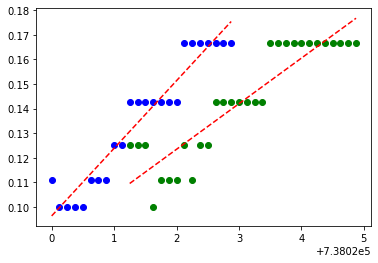

In [18]:
#trends
import pylab
import numpy
pylab.plot(swell1XDatenum,swell1Freq,'o', color='blue', label = 'swell 1')
pylab.plot(swell2XDatenum,swell2Freq,'o',  color='green', label = 'swell 2')

# calc the trendline
z1 = numpy.polyfit(swell1XDatenum, swell1Freq, 1)
print(z1)
p = numpy.poly1d(z1)
pylab.plot(swell1XDatenum,p(swell1XDatenum),"r--")

z2 = numpy.polyfit(swell2XDatenum, swell2Freq, 1)
p = numpy.poly1d(z2)
pylab.plot(swell2XDatenum,p(swell2XDatenum),"r--")

"By using a simple formula we can use the rate of frequency increase 
to estimate how far away the storm was; the distance in km from the storm to the coast
is equal to 2.8 divided by the rate of change of frequency in Hz per hr."

In [22]:
MSWcoef = 2.8 #whole magic is creted
hourDatenum = (swell1XDatenum[1]-swell1XDatenum[0])/3

swell1Rate = hourDatenum * z1[0]
swell2Rate = hourDatenum * z2[0]

distStorm1 = 2.8/swell1Rate
distStorm2 = 2.8/swell2Rate

print("swell 1 rate: " + str(swell1Rate) + " Hz/h")
print("Storm 1 distance: " +  str(distStorm1) + " km")
print()
print("swell 2 rate: " + str(swell2Rate) + " Hz/h")
print("Storm 2 distance: " +  str(distStorm2) + " km")
print()
 


swell 1 rate: 0.0011465378422937703 Hz/h
Storm 1 distance: 2442.1348312396767 km

swell 2 rate: 0.0007728752111208715 Hz/h
Storm 2 distance: 3622.835820984951 km

